In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from joblib import dump

# Load the dataset
filename = 'D:/MSU_IIT/4th_Year/1st_Semester/ITD105/Dataset/Rainfall_data.csv'
names = ['Year', 'Month', 'Day', 'Specific_Humidity', 'Relative_Humidity', 'Temperature', 'Precipitation']
dataframe = read_csv(filename)

# Drop the "Day" column
dataframe = dataframe.drop('Day', axis=1)

# Separate features (X) and target variable (Y)
X = dataframe.drop('Precipitation', axis=1)
Y = dataframe['Precipitation']

# Split the dataset into an 80:20 train-test split
test_size = 0.2
seed = 42  # Random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Split the dataset into an 80:20 train-test split
test_size = 0.2
seed = 42  # Random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the data on a Decision Tree Regression model  # Change: Use DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=seed)
decision_tree_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = decision_tree_model.predict(X_test)

# Save the trained Decision Tree model
dump(decision_tree_model, 'precip_model.joblib')
# Calculate the mean squared error on the test set
mse = mean_squared_error(Y_test, Y_pred)
print("Best Decision Tree MSE: %.3f" % mse)

Best Decision Tree MSE: 24787.313


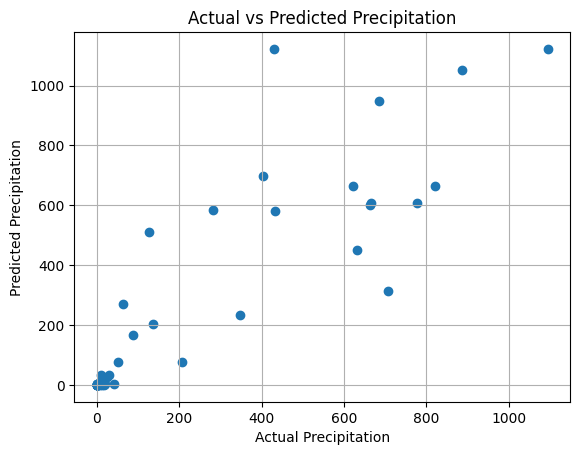

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.grid(True)
plt.show()